In [18]:
from sklearn.datasets import load_boston
import pandas as pd
data = pd.read_csv(load_boston()['filename'], skiprows=1)

In [19]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Посмотрим, есть ли пропуски в датасете

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Пропусков нет, посмотрим тогда на качество данных

In [21]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


CRIM
Выбросы определенно есть, т.к. максимальное значение намного выше среднего или сигмы > 75%
Требуется проверка

ZN
Так же, очень похоже, что есть выброс, т.к. значение сильно отклоняется от среднего и каждой из сигм. 
Требуется проверка

INDUS
Все среднестатистические показатели в норме
Проверка не требуется

CHAS
Все среднестатистические показатели в норме
Проверка не требуется

NOX
Все среднестатистические показатели в норме
Проверка не требуется

RM
Все среднестатистические показатели в норме
Проверка не требуется

AGE
Миниальное значение выглядит слишком малым.
Требуется проверка

DIS
Максимальное значение намного выше, чем среднестатистическое и сигма >75%
Требуется проверка

RAD
Все среднестатистические показатели в норме
Проверка не требуется

TAX
Все среднестатистические показатели в норме
Проверка не требуется

PTRATIO
Все среднестатистические показатели в норме
Проверка не требуется

B
Минимальное значение не выглядит естесственно
Требуется проверка

LSTAT
Максимальное значение выглядит весьма выше, чем сигма >75%
Требуется проверка

MEDV
Все среднестатистические показатели в норме. На всякий случай посмотрим на гистограмму
Проверка не требуется

Посмотрим на гистограмму целевого столбца

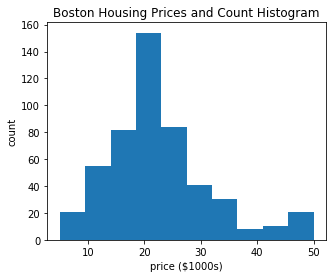

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
plt.hist(data.MEDV)
plt.title('Boston Housing Prices and Count Histogram')
plt.xlabel('price ($1000s)')
plt.ylabel('count')
plt.show()

Вроде никак отклонений не видно, гистограмма почти по нормальному закону распределена

__Проверка сомнительных столбцов__

CRIM

In [7]:
print(data[data['CRIM'] > 9].shape) #выше стандартного отклонения
data[data['CRIM'] > 9].head()

(66, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
367,13.5222,0.0,18.1,0,0.631,3.863,100.0,1.5106,24,666,20.2,131.42,13.33,23.1
371,9.2323,0.0,18.1,0,0.631,6.216,100.0,1.1691,24,666,20.2,366.15,9.53,50.0
373,11.1081,0.0,18.1,0,0.668,4.906,100.0,1.1742,24,666,20.2,396.90,34.77,13.8
374,18.4982,0.0,18.1,0,0.668,4.138,100.0,1.1370,24,666,20.2,396.90,37.97,13.8
375,19.6091,0.0,18.1,0,0.671,7.313,97.9,1.3163,24,666,20.2,396.90,13.44,15.0


Везде, где уровень преступности CRIM > 9, TAX =666, RAD =24. Наврядли это ошибка.
Посмотрим на данные, в которые CRIM больше 50%

In [8]:
print(data[data['CRIM'] > 50].shape)
data[data['CRIM'] > 50].head()

(4, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
380,88.9762,0.0,18.1,0,0.671,6.968,91.9,1.4165,24,666,20.2,396.90,17.21,10.4
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0
410,51.1358,0.0,18.1,0,0.597,5.757,100.0,1.4130,24,666,20.2,2.60,10.11,15.0
418,73.5341,0.0,18.1,0,0.679,5.957,100.0,1.8026,24,666,20.2,16.45,20.62,8.8


Я думаю, что можно исключать записи с уровнем приступности выше 50%, т.к. это может сильно повлиять на модель

In [22]:
data = data[data['CRIM'] < 50]
data.shape

(502, 14)

ZN

In [10]:
print(data[data['ZN'] == 0].shape) #проверим, где нулевые значения и сколько их
data[data['ZN'] == 0].head()

(368, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


Нулевых значений больше половины, это не может быть ошибкой. Оставим все значений

DIS

In [11]:
print(data[data['DIS'] > 4].shape) #выше среднего
data[data['DIS'] > 4].head()

(190, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Показатели выглядят реалистичными. 

AGE

In [12]:
print(data[data['AGE'] < 68].shape) #меньше среднего значения
data[data['AGE'] < 68].head()

(211, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


Попробую значения ближе к минимальному

In [16]:
print(data[data['AGE'] < 8].shape) #близкое к минимальному
data[data['AGE'] < 8]

(9, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
41,0.12744,0.0,6.91,0,0.448,6.770,2.9,5.7209,3,233,17.9,385.41,4.84,26.6
42,0.14150,0.0,6.91,0,0.448,6.169,6.6,5.7209,3,233,17.9,383.37,5.81,25.3
43,0.15936,0.0,6.91,0,0.448,6.211,6.5,5.7209,3,233,17.9,394.46,7.44,24.7
70,0.08826,0.0,10.81,0,0.413,6.417,6.6,5.2873,4,305,19.2,383.73,6.72,24.2
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52,22.8
73,0.19539,0.0,10.81,0,0.413,6.245,6.2,5.2873,4,305,19.2,377.17,7.54,23.4
74,0.07896,0.0,12.83,0,0.437,6.273,6.0,4.2515,5,398,18.7,394.92,6.78,24.1
243,0.12757,30.0,4.93,0,0.428,6.393,7.8,7.0355,6,300,16.6,374.71,5.19,23.7
252,0.08221,22.0,5.86,0,0.431,6.957,6.8,8.9067,7,330,19.1,386.09,3.53,29.6


Я думаю, что можно удалить 1 строку, где AGE =2.9, так как считаю, что это выброс

In [23]:
data = data[data['AGE'] > 3]
data.shape

(501, 14)

B

Если честно, то вообще непонятен столбец B. Попробую вытащить Bk

In [24]:
def convert_d(data):
    converted = (data**(0.5))/1000 + 0.63
    return(converted)

data['B'] = data['B'].map(convert_d)

In [25]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,0.649922,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,0.649922,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,0.649820,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,0.649865,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,0.649922,5.33,36.2


Посмотрим, что изменилось с точки зрения статистики со столбцом B

In [26]:
data.B.describe()

count    501.000000
mean       0.648596
std        0.003475
min        0.630566
25%        0.649378
50%        0.649786
75%        0.649906
max        0.649922
Name: B, dtype: float64

Как видно, значения не сильно отличаются друг от друга. 

LSTAT

In [27]:
print(data[data['LSTAT'] > 30].shape) #близкое к максимальному
data[data['LSTAT'] > 30].head()

(12, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,0.649922,30.81,14.4
141,1.62864,0.0,21.89,0,0.624,5.019,100.0,1.4394,4,437,21.2,0.649922,34.41,14.4
373,11.10810,0.0,18.10,0,0.668,4.906,100.0,1.1742,24,666,20.2,0.649922,34.77,13.8
374,18.49820,0.0,18.10,0,0.668,4.138,100.0,1.1370,24,666,20.2,0.649922,37.97,13.8
384,20.08490,0.0,18.10,0,0.700,4.368,91.2,1.4395,24,666,20.2,0.646907,30.63,8.8


Значения выглядят реалистичными

Поскольку ни пропусков, ни каких-то выбросов в датасете больше не наблюдается, то попробуем сначала построить линейную модель, используя все столбцы

__Линейная регрессия__

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Сначала разделим данные на обучающие и тренировочные, удалив затем столбец medv

In [29]:
data_train, data_test = train_test_split(data, test_size=0.3,  random_state=42)

In [30]:
y_train, y_test = data_train['MEDV'], data_test['MEDV']
del data_train['MEDV']
del data_test['MEDV']

Строим модель линейной регрессии

In [31]:
model = LinearRegression()
model.fit(data_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
y_pred = model.predict(data_test)

Считаем, насколько качественно модель предсказывает MEDV

In [33]:
import numpy as np

In [34]:
from sklearn import metrics 
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Score:", model.score(data_test, y_test)) 

MAE 2.842377355565397
MSE 16.110440412034343
RMSE 4.013781310937897
Score: 0.7961969617590887


вероятность предсказания правильной цены составляет 79,6%.

А что, если взять только те столбцы, с которыми наибольшая по модуля корреляция (по модулю больше 0,5)

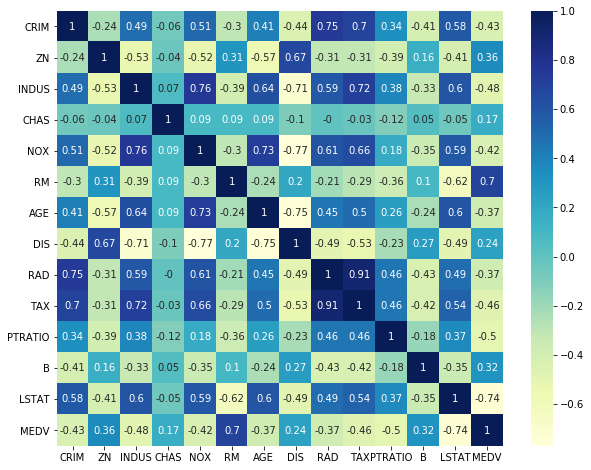

In [35]:
import seaborn as sns

plt.figure(figsize=(10, 8))
correlation_matrix = data.corr().round(2)
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True)
plt.show()

In [36]:
dt_short = data[['RM', 'PTRATIO', 'LSTAT', 'MEDV']]
dt_short.head()

,RM,PTRATIO,LSTAT,MEDV
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


Разделяем данные и удаляем целевой столбец

In [37]:
dt_train, dt_test = train_test_split(dt_short, test_size=0.3,  random_state=42)

In [38]:
y_train, y_test = dt_train['MEDV'], dt_test['MEDV']
del dt_train['MEDV']
del dt_test['MEDV']

Строим модель линейной регрессии

In [39]:
model = LinearRegression()
model.fit(dt_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
y_pred = model.predict(dt_test)

Считаем, насколько качественно модель предсказывает MEDV

In [42]:
from sklearn import metrics 
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Score:", model.score(dt_test, y_test)) 

MAE 3.5911786565829553
MSE 26.012211922126255
RMSE 5.100216850500208
Score: 0.650904156861472


Нет, качество предсказания ухудшилось.

Тогда оставляем первую модель, уровень предсказания которой составил 79,6%